<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Изучение-данных-из-файлов" data-toc-modified-id="1.-Изучение-данных-из-файлов"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файлов</a></span><ul class="toc-item"><li><span><a href="#1.1-Вывод" data-toc-modified-id="1.1-Вывод"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#2.-Подготовка-данных" data-toc-modified-id="2.-Подготовка-данных"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#3.-Анализ-данных" data-toc-modified-id="3.-Анализ-данных"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#4.-Проверка-гипотезы:" data-toc-modified-id="4.-Проверка-гипотезы:"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотезы:</a></span></li><li><span><a href="#5.-Общий-вывод" data-toc-modified-id="5.-Общий-вывод"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a 

# Анализ тарифов компании «Мегалайн»

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. <p>
    В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## 1. Изучение данных из файлов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import math
import numpy as np
import seaborn as sns

<div class="alert alert-info">
 <font color='Blue'>
     <b>Открываем файлы с данными и изучаем общую информацию (всего 5 файлов)

In [2]:
df_calls=pd.read_csv('/datasets/calls.csv') # открываем файл calls.csv
df_calls.info()
df_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
df_internet=pd.read_csv('/datasets/internet.csv') # открываем файл internet.csv
df_internet.info()
df_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [4]:
df_messages=pd.read_csv('/datasets/messages.csv') # открываем файл messages.csv
df_messages.info()
df_messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [5]:
df_tariffs=pd.read_csv('/datasets/tariffs.csv') # открываем файл tariffs.csv
df_tariffs.info()
df_tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [6]:
df_users=pd.read_csv('/datasets/users.csv') # открываем файл users.csv
df_users.info()
df_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


## 2. Подготовка данных
<p>
 - Приведём данные к нужным типам;
    <p>
 - Поиск и исправление ошибок в данных, если они есть.  

<div class="alert alert-info">
 <font color='Blue'>
     <b>В датафрейме internet удаляю аномальный столбец "unnamed", так как в нём нет никакой информации.

In [7]:
df_internet.pop('Unnamed: 0')

0              0
1              1
2              2
3              3
4              4
           ...  
149391    149391
149392    149392
149393    149393
149394    149394
149395    149395
Name: Unnamed: 0, Length: 149396, dtype: int64

<div class="alert alert-info">
 <font color='Blue'>
     <b>В колнке "duration" (calls) округляю длительность звонков до целых минут в большую сторону, так как в «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.</b>   

In [8]:
df_calls['duration']=df_calls['duration'].apply(np.ceil)
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


<div class="alert alert-info">
 <font color='Blue'>
         <b>В колнке "mb_used" (internet) округляю использование веб-трафика до гигабайт так как,  для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

<div class="alert alert-info">
 <font color='Blue'>
         <b> Убрал ячейку с округлением и переводом в ГБ.

<div class="alert alert-info">
 <font color='Blue'>Проверю данные на возможные ошибки

<div class="alert alert-info">
 <font color='Blue'>
         <b> Проверим длительность звонков. 

In [9]:
df_calls['duration'].max()


38.0

<AxesSubplot:>

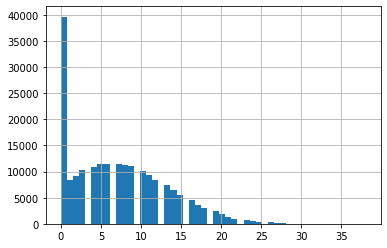

In [10]:
df_calls['duration'].hist(bins=50)


<div class="alert alert-info">
 <font color='Blue'>
         <b> Самый длинный разговор - 38 минут, что не является аномальным значением.

<AxesSubplot:>

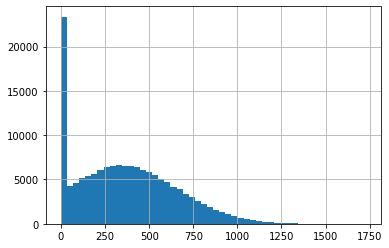

In [11]:
df_internet['mb_used'].hist(bins=50)


<div class="alert alert-info">
 <font color='Blue'>
         <b> По графику не видно аномальных значений, но обнаружено большое количество нулей.

In [12]:
df_internet['mb_used'].max()


1724.83

In [13]:
df_internet['mb_used'].value_counts()

0.00      19598
335.91        9
447.30        9
197.56        9
199.11        8
          ...  
182.69        1
726.03        1
315.12        1
898.99        1
677.66        1
Name: mb_used, Length: 70003, dtype: int64

<div class="alert alert-info">
 <font color='Blue'>
         <b> Предположение: много значений было записано как 0.00, возможно, из-за ошибок округления. Вероятнее всего, данные строки имели очень малое значение, заменим их на 0.01

In [14]:
df_internet.loc[df_internet['mb_used'] == 0 , 'mb_used'] = 0.01


In [15]:
df_internet['mb_used'].value_counts()

0.01       19598
197.56         9
447.30         9
335.91         9
411.53         8
           ...  
1392.42        1
646.25         1
954.90         1
714.40         1
677.66         1
Name: mb_used, Length: 70003, dtype: int64

<div class="alert alert-info">
 <font color='Blue'>
         <b> Устранили вероятное аномальное значение в internet

<div class="alert alert-info">
 <font color='Blue'>
         <b> Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам:

In [16]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format="%Y/%m/%d")
df_calls['month'] = df_calls['call_date'].dt.month # добавляю колонку с месяцем
df_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


In [17]:
df_calls_grouped=df_calls.pivot_table(index=['user_id','month'],values='duration',aggfunc=['sum','count'])#сводная таблица для удобного просмотра
df_calls_grouped.reset_index(inplace=True) #многомерная индексация не позволяла объединять таблицы
df_calls_grouped.columns = ['user','month','total duration of calls','number of calls'] #переименовывам столбцы в более удобные
df_calls_grouped.head()

,user,month,total duration of calls,number of calls
0,1000,5,159.0,22
1,1000,6,172.0,43
2,1000,7,340.0,47
3,1000,8,408.0,52
4,1000,9,466.0,58


<div class="alert alert-info">
 <font color='Blue'>
         <b> Посчитаем для каждого пользователя количество отправленных сообщений по месяцам:

In [18]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format="%Y/%m/%d")
df_messages['month'] = df_messages['message_date'].dt.month # добавляю колонку с месяцем
df_messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [19]:
df_messages_grouped=df_messages.pivot_table(index=['user_id','month'],values='id',aggfunc=['count'])
df_messages_grouped.reset_index(inplace=True)
df_messages_grouped.columns=['user','month','number of messages']

df_messages_grouped.head()

,user,month,number of messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


<div class="alert alert-info">
 <font color='Blue'>
         <b> Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам:

In [20]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format="%Y/%m/%d")
df_internet['month'] = df_internet['session_date'].dt.month # добавляю колонку с месяцем
df_internet.head()


,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [21]:
df_internet_grouped=df_internet.pivot_table(index=['user_id','month'],values='mb_used',aggfunc=['sum'])
df_internet_grouped.reset_index(inplace=True)
df_internet_grouped.columns = ['user','month','total internet traffic']
df_internet_grouped.head()

,user,month,total internet traffic
0,1000,5,2253.50
1,1000,6,23233.82
2,1000,7,14003.65
3,1000,8,14055.95
4,1000,9,14568.93


<div class="alert alert-info">
 <font color='Blue'>
          Исправил на sum. Не заметил ошибку.

<div class="alert alert-info">
 <font color='Blue'>
         <b> Посчитаем для каждого пользователя помесячную выручку с каждого пользователя <p>
             </b> (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану). <p>
     <b> Для этого объединим все таблицы в одну общую:

In [22]:
group_data=pd.merge(pd.merge(df_calls_grouped,df_messages_grouped, how='outer', 
                             left_on=['user', 'month'], right_on=['user', 'month']),
                    df_internet_grouped,how='outer', left_on=['user', 'month'], right_on=['user', 'month'])
group_data=group_data.sort_values(by='user')
group_data = group_data.query('month!=0')
group_data

,user,month,total duration of calls,number of calls,number of messages,total internet traffic
0,1000,5,159.0,22.0,22.0,2253.50
1,1000,6,172.0,43.0,60.0,23233.82
2,1000,7,340.0,47.0,75.0,14003.65
3,1000,8,408.0,52.0,81.0,14055.95
4,1000,9,466.0,58.0,57.0,14568.93
...,...,...,...,...,...,...
3169,1498,10,247.0,41.0,42.0,20579.46
3173,1499,12,492.0,69.0,66.0,13055.63
3170,1499,9,70.0,9.0,11.0,1845.76
3171,1499,10,449.0,68.0,48.0,17788.66


In [23]:
group_data.isna().sum()#смотрим пропуски

user                         0
month                        0
total duration of calls     40
number of calls             40
number of messages         497
total internet traffic      11
dtype: int64

In [24]:
group_data.fillna(0, inplace=True)#заполнил NaN нулями

In [25]:
group_data.isna().sum()

user                       0
month                      0
total duration of calls    0
number of calls            0
number of messages         0
total internet traffic     0
dtype: int64

In [26]:
group_data

,user,month,total duration of calls,number of calls,number of messages,total internet traffic
0,1000,5,159.0,22.0,22.0,2253.50
1,1000,6,172.0,43.0,60.0,23233.82
2,1000,7,340.0,47.0,75.0,14003.65
3,1000,8,408.0,52.0,81.0,14055.95
4,1000,9,466.0,58.0,57.0,14568.93
...,...,...,...,...,...,...
3169,1498,10,247.0,41.0,42.0,20579.46
3173,1499,12,492.0,69.0,66.0,13055.63
3170,1499,9,70.0,9.0,11.0,1845.76
3171,1499,10,449.0,68.0,48.0,17788.66


In [27]:
grouped_data_with_tariff = pd.merge(pd.merge(group_data, df_users, left_on='user', how='left', right_on='user_id'),
                                    df_tariffs, how='left', left_on='tariff', right_on = 'tariff_name')
grouped_data_with_tariff #добавляю тариф к каждому пользователю

,user,month,total duration of calls,number of calls,number of messages,total internet traffic,user_id,age,churn_date,city,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,159.0,22.0,22.0,2253.50,1000,52,NaN,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,172.0,43.0,60.0,23233.82,1000,52,NaN,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,340.0,47.0,75.0,14003.65,1000,52,NaN,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,408.0,52.0,81.0,14055.95,1000,52,NaN,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,466.0,58.0,57.0,14568.93,1000,52,NaN,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,247.0,41.0,42.0,20579.46,1498,68,2018-10-25,Владикавказ,...,2018-07-19,smart,50,15360,500,550,200,3,3,smart
3210,1499,12,492.0,69.0,66.0,13055.63,1499,35,NaN,Пермь,...,2018-09-27,smart,50,15360,500,550,200,3,3,smart
3211,1499,9,70.0,9.0,11.0,1845.76,1499,35,NaN,Пермь,...,2018-09-27,smart,50,15360,500,550,200,3,3,smart
3212,1499,10,449.0,68.0,48.0,17788.66,1499,35,NaN,Пермь,...,2018-09-27,smart,50,15360,500,550,200,3,3,smart


In [28]:
grouped_data_with_tariff=grouped_data_with_tariff.drop(['user_id'],axis=1) #удалю повторы
grouped_data_with_tariff=grouped_data_with_tariff.drop(['tariff_name'],axis=1)

In [29]:
grouped_data_with_tariff

,user,month,total duration of calls,number of calls,number of messages,total internet traffic,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,22.0,2253.50,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,43.0,60.0,23233.82,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,47.0,75.0,14003.65,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,52.0,81.0,14055.95,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,58.0,57.0,14568.93,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,247.0,41.0,42.0,20579.46,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3
3210,1499,12,492.0,69.0,66.0,13055.63,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
3211,1499,9,70.0,9.0,11.0,1845.76,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
3212,1499,10,449.0,68.0,48.0,17788.66,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3


<div class="alert alert-info">
 <font color='Blue'>
Посчитаем помесячную выручку с каждого пользователя (вычтим бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

In [30]:
def one_client_cash(row):
    #Абонентская плата
    cash = row['rub_monthly_fee']
    
    #Превышение тарифа по инету
    internet = row['total internet traffic'] - row['mb_per_month_included']
    if internet > 0:
        cash += math.ceil(internet/1024) * row['rub_per_gb']
    
    #Превышение тарифа по сообщениям
    messages = row['number of messages'] - row['messages_included']
    if messages > 0:
        cash += messages * row['rub_per_message']
    
    #Превышение тарифа по звонкам
    calls = row['total duration of calls'] - row['minutes_included']
    if calls > 0:
        cash += calls*row['rub_per_minute']
    return cash

In [31]:
grouped_data_with_tariff['cash']=grouped_data_with_tariff.apply(one_client_cash,axis=1)
grouped_data_with_tariff


,user,month,total duration of calls,number of calls,number of messages,total internet traffic,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,cash
0,1000,5,159.0,22.0,22.0,2253.50,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,172.0,43.0,60.0,23233.82,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,340.0,47.0,75.0,14003.65,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,408.0,52.0,81.0,14055.95,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,466.0,58.0,57.0,14568.93,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,247.0,41.0,42.0,20579.46,68,2018-10-25,Владикавказ,Всеволод,...,2018-07-19,smart,50,15360,500,550,200,3,3,1750.0
3210,1499,12,492.0,69.0,66.0,13055.63,35,NaN,Пермь,Гектор,...,2018-09-27,smart,50,15360,500,550,200,3,3,598.0
3211,1499,9,70.0,9.0,11.0,1845.76,35,NaN,Пермь,Гектор,...,2018-09-27,smart,50,15360,500,550,200,3,3,550.0
3212,1499,10,449.0,68.0,48.0,17788.66,35,NaN,Пермь,Гектор,...,2018-09-27,smart,50,15360,500,550,200,3,3,1150.0


<div class="alert alert-info">
 <font color='Blue'>
Добавил math.ceil(internet/1024) к измерению трафика.

In [32]:
grouped_data_with_tariff

,user,month,total duration of calls,number of calls,number of messages,total internet traffic,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,cash
0,1000,5,159.0,22.0,22.0,2253.50,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,172.0,43.0,60.0,23233.82,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,340.0,47.0,75.0,14003.65,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,408.0,52.0,81.0,14055.95,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,466.0,58.0,57.0,14568.93,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,247.0,41.0,42.0,20579.46,68,2018-10-25,Владикавказ,Всеволод,...,2018-07-19,smart,50,15360,500,550,200,3,3,1750.0
3210,1499,12,492.0,69.0,66.0,13055.63,35,NaN,Пермь,Гектор,...,2018-09-27,smart,50,15360,500,550,200,3,3,598.0
3211,1499,9,70.0,9.0,11.0,1845.76,35,NaN,Пермь,Гектор,...,2018-09-27,smart,50,15360,500,550,200,3,3,550.0
3212,1499,10,449.0,68.0,48.0,17788.66,35,NaN,Пермь,Гектор,...,2018-09-27,smart,50,15360,500,550,200,3,3,1150.0


##  3. Анализ данных

 <div class="alert alert-info">
 <font color='Blue'>
         Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

 <div class="alert alert-info">
 <font color='Blue'>
         <b> Посчитаем среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [33]:
data_analys=grouped_data_with_tariff.pivot_table(index=['tariff','month'],values=['number of calls','total duration of calls','number of messages','cash'],aggfunc=['mean'] )

In [34]:
data_analys

mean                                     \
                     cash number of calls number of messages   
tariff month                                                   
smart  1       721.323529       27.676471          18.235294   
       2       827.603448       40.189655          24.086207   
       3      1164.623377       54.324675          31.857143   
       4       963.089286       51.312500          30.741071   
       5      1197.510638       55.241135          33.773050   
       6      1204.018293       55.548780          33.402439   
       7      1223.950249       56.726368          33.751244   
       8      1320.595745       58.978723          33.638298   
       9      1249.946154       59.546154          33.638462   
       10     1364.853741       59.962585          33.765306   
       11     1343.680380       61.503165          34.075949   
       12     1578.531157       66.486647          35.994065   
ultra  1      1950.000000       59.444444          33.777778   
       2      1975.000000       41.541667          21.958333   
       3      2014.864865       67.675676          32.297297   
       4      2001.818182       64.090909          31.563636   
       5      2059.701493       72.507463          37.850746   
       6      2039.285714       66.738095          41.726190   
       7      2118.131868       75.780220          49.846154   
       8      2083.177570       71.289720          48.439252   
       9      2024.347826       74.600000          52.286957   
       10     2065.853659       77.373984          58.430894   
       11     2092.164179       75.119403          55.791045   
       12     2138.848921       83.316547          60.611511   

                                      
             total duration of calls  
tariff month                          
smart  1                  203.852941  
       2                  298.689655  
       3                  390.051948  
       4                  367.133929  
       5                  387.361702  
       6                  395.640244  
       7                  408.353234  
       8                  421.468085  
       9                  428.611538  
       10                 426.136054  
       11                 435.265823  
       12                 478.560831  
ultra  1                  428.111111  
       2                  297.125000  
       3                  489.648649  
       4                  458.018182  
       5                  510.328358  
       6                  479.702381  
       7                  545.791209  
       8                  510.775701  
       9                  539.443478  
       10                 558.081301  
       11                 541.380597  
       12                 592.805755

In [35]:
statistics = grouped_data_with_tariff.pivot_table(index=['tariff'],
                                                  values=['number of messages',
                                                          'total duration of calls',
                                                          'total internet traffic',
                                                          'cash' ],
                       aggfunc=['mean', np.var, np.std])
statistics

mean                                             \
               cash number of messages total duration of calls   
tariff                                                           
smart   1290.063257          33.384029              417.934948   
ultra   2070.152284          49.363452              526.623350   

                                         var                     \
       total internet traffic           cash number of messages   
tariff                                                            
smart            16208.466949  669850.336661         796.812958   
ultra            19468.823228  141516.745079        2285.266143   

                                                              std  \
       total duration of calls total internet traffic        cash   
tariff                                                              
smart             36219.315784           3.446276e+07  818.443851   
ultra            100873.633397           1.017512e+08  376.187114   

                                                                          
       number of messages total duration of calls total internet traffic  
tariff                                                                    
smart           28.227876              190.313730            5870.498853  
ultra           47.804457              317.606098           10087.178654

 <div class="alert alert-info">
 <font color='Blue'>
         <b> Построим гистограммы и опишем распределения.

In [36]:
grouped_data_with_tariff.head()

,user,month,total duration of calls,number of calls,number of messages,total internet traffic,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,cash
0,1000,5,159.0,22.0,22.0,2253.50,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,172.0,43.0,60.0,23233.82,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,340.0,47.0,75.0,14003.65,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,408.0,52.0,81.0,14055.95,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,466.0,58.0,57.0,14568.93,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


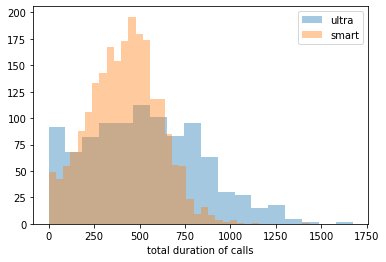

In [37]:
for tariff in ['ultra', 'smart']:
    sns.distplot(grouped_data_with_tariff.query('tariff == @tariff')['total duration of calls'], kde=False, label=tariff)
_ = plt.legend(['ultra', 'smart'])
  

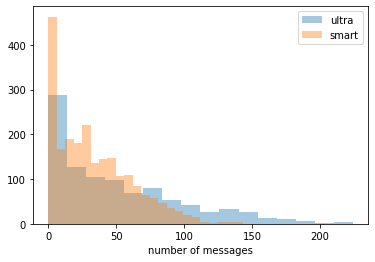

In [38]:
for tariff in ['ultra', 'smart']:
    sns.distplot(grouped_data_with_tariff.query('tariff == @tariff')['number of messages'], kde=False, label=tariff)
_ = plt.legend(['ultra', 'smart'])

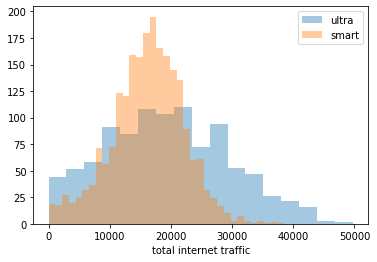

In [39]:
for tariff in ['ultra', 'smart']:
    sns.distplot(grouped_data_with_tariff.query('tariff == @tariff')['total internet traffic'], kde=False, label=tariff)
_ = plt.legend(['ultra', 'smart'])

 <div class="alert alert-info">
 <font color='Blue'>
        По гистограммам видно, что дисперсия по тарифу "Смарт" меньше, чем у тарифа "Ультра" по длительности разговора, по числу сообщений и по использованному интернет-трафику.<p>
             У пользователей тарифа "Ультра" больше свободы в выборе того, как использовать тарифный пакет, так как у пользователей более дорогого тарифа нет необходимости переживать за то что у них закончиться лимит.

##  4. Проверка гипотезы:
<p>
    - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
    <p>
 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [40]:
alpha = .05 # критический уровень статистической значимости
ultra=grouped_data_with_tariff.query('tariff=="ultra"')['cash']
smart=grouped_data_with_tariff.query('tariff=="smart"')['cash']
print(smart)

8        550.0
9       1150.0
10       550.0
11      1150.0
12      1550.0
         ...  
3209    1750.0
3210     598.0
3211     550.0
3212    1150.0
3213    1513.0
Name: cash, Length: 2229, dtype: float64


In [41]:
print('Помесячная выручка с тарифа ultra',len(ultra)*ultra.mean())

Помесячная выручка с тарифа ultra 2039099.9999999998


In [42]:
print('Помесячная выручка с тарифа smart',len(smart)*smart.mean())

Помесячная выручка с тарифа smart 2875551.0


 <div class="alert alert-info">
 <font color='Blue'>
      <b>Проверим нулевую гипотезу H0 - средняя выручка не отличается. Альтернативная гипотеза соответственно H1 - средняя выручка отличается. Используем ttest критерий для проверки гипотезы с односторонней критической областью

In [43]:
results = st.ttest_ind(
    ultra, 
    smart)
print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.5788252532156112e-160
Отвергаем нулевую гипотезу


 <div class="alert alert-info">
 <font color='Blue'>
 <b> Вывод: средняя выручка пользователей с разными тарифами действительно отличается. Значение p-value настолько маленькое, что автоматически округляется к нулю

 <div class="alert alert-info">
 <font color='Blue'>
      <b> Проверим нулевую гипотезу H0 - средняя выручка Московских пользователей не отличается от выручки с пользователей других регионов. Альтернативная гипотеза соответственно H1 - средняя выручка отличается. Используем ttest критерий для проверки гипотезы с односторонней критической областью

In [44]:
only_moscow=grouped_data_with_tariff.query('city=="Москва"')
only_moscow_cash=only_moscow['cash']
not_moscow=grouped_data_with_tariff.query('city!="Москва"')
not_moscow_cash=not_moscow['cash']

results = st.ttest_ind(
    only_moscow_cash, 
    not_moscow_cash)
print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.5379832328819518
Не получилось отвергнуть нулевую гипотезу


##  5. Общий вывод

 <div class="alert alert-info">
 <font color='Blue'>
 <b>В тарифе Ultra практически никто не выходит за рамки тарифа, тогда как в тарифе Smart при стоимости 550р в месяц разброс относительно большой
Для тарифа Ultra нормальное значение - цена тарифа, 2070. 
После проверки гипотез, делаем вывод о том, что тариф ultra приносит значительно больше денег. Однако, стоит учесть, что тариф smart выбирает большее количество человек.

<div class="alert alert-info">
 <font color='Blue'>
<b>Краткий обзор выполненных работ:  </b><p> 
    Привел данные к нужным типам. Нашёл и исправил ошибки. Посчитал для каждого пользователя:<p>
количество сделанных звонков и израсходованных минут разговора по месяцам;<p>
количество отправленных сообщений по месяцам;<p>
объем израсходованного интернет-трафика по месяцам;<p>
помесячную выручку с каждого пользователя<p>
      <b>Основные выводы: </b><p> 
Доходы от тарифа «Ультра» больше, чем от тарифа «Смарт»<p>   
Пользователям тарифа «Смарт» не хватает услуг в рамках тарифного пакета, поэтому им приходиться доплачивать.<p>
Пользователи тарифа «Ультра», не используют тарифный пакет в полном объеме.<p>
     Доход от клиентов из Московской области не отличается от дохода клиентов других регионов<p>
          <b>Рекомендации: </b><p> 
     Тариф "Смарт" можно сделать немного подороже и увеличить лимиты по количеству минут, смс и трафика, а тариф "Ультра" сделать немного дешевле, что бы привлечь большее количество клиентов.
